How is the ucu term functioning? 
How does dic function in absence of winds?

    changeset:   2315:846722adff8e
    /data/tjarniko/MEOPAR/SS-run-sets/SalishSea/nemo3.6/tereza/SKOG_diag_chlr/3ts_test
    SKOG_3ts.yaml

       cn_exp      = "SalishSea"  ! experience name
       nn_it000    =      3520801    ! first time step
       nn_itend    =      3520891    ! last time step (std 1 day = 2160 re: rn_rdt=40 in &namdom)
       nn_date0    =  20180501    ! date at nn_it000 (format yyyymmdd) ie START OF THIS SEGMENT
                                  ! used to adjust tides to run date (regardless of restart control)
       nn_leapy    =       1      ! Leap year calendar (1) or not (0)


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import cmocean as cm
import glob
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow

%matplotlib inline

In [4]:
reload(cs)


<module 'CCCma_stations' from '/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src/CCCma_stations.py'>

In [5]:
print(cs.STATIONS['JDFB']['x'])
tstat = list(cs.STATIONS.keys())

0


In [6]:
# mar22_SKOG90ts/
# mar22_SKOG90ts_nowind/
tdir = '/data/tjarniko/results/mar22_SKOG90ts/'
tdir2 = '/data/tjarniko/results/mar22_SKOG90ts_nowind/'
tnc = 'SalishSea*_carp_T_*.nc'
tpath = glob.glob(tdir+tnc)
tpath2 = glob.glob(tdir2+tnc)
tpath = tpath[0]
tpath2 = tpath2[0]
ts = nc.Dataset(tpath)
ts2 = nc.Dataset(tpath2)
#print(ts)


In [7]:
dic = ts.variables['dissolved_inorganic_carbon']
udic = ts.variables['uptake_DIC']
uuc = ts.variables['uptake_UC']
flco2 = ts.variables['co2_flux_mmol_m2_s']


dic_nw = ts2.variables['dissolved_inorganic_carbon']
udic_nw = ts2.variables['uptake_DIC']
uuc_nw = ts2.variables['uptake_UC']
flco2_nw = ts2.variables['co2_flux_mmol_m2_s']


## Formulation for instantaneous uptake of DIC and UC

                f_uptake_DIC(ji,jj,jk) =  ( &
               (zz_uptake_NO_diat(ji,jj,jk)+zz_uptake_NH_diat(ji,jj,jk)+zz_uptake_PC_diat(ji,jj,jk) + &
               zz_uptake_NO_nano(ji,jj,jk)+zz_uptake_NH_nano(ji,jj,jk)+zz_uptake_PC_nano(ji,jj,jk) + &
               zz_uptake_NO_myri(ji,jj,jk)+zz_uptake_NH_myri(ji,jj,jk)+zz_uptake_PC_myri(ji,jj,jk)) &
                ) * zz_redfield_c_n

               f_uptake_UC(ji,jj,jk) =  ( &
               (zz_uptake_PC_diat(ji,jj,jk) + &
                zz_uptake_PC_nano(ji,jj,jk) + &
                zz_uptake_PC_myri(ji,jj,jk)) &
                ) * zz_redfield_c_n

## DIC and UC uptake

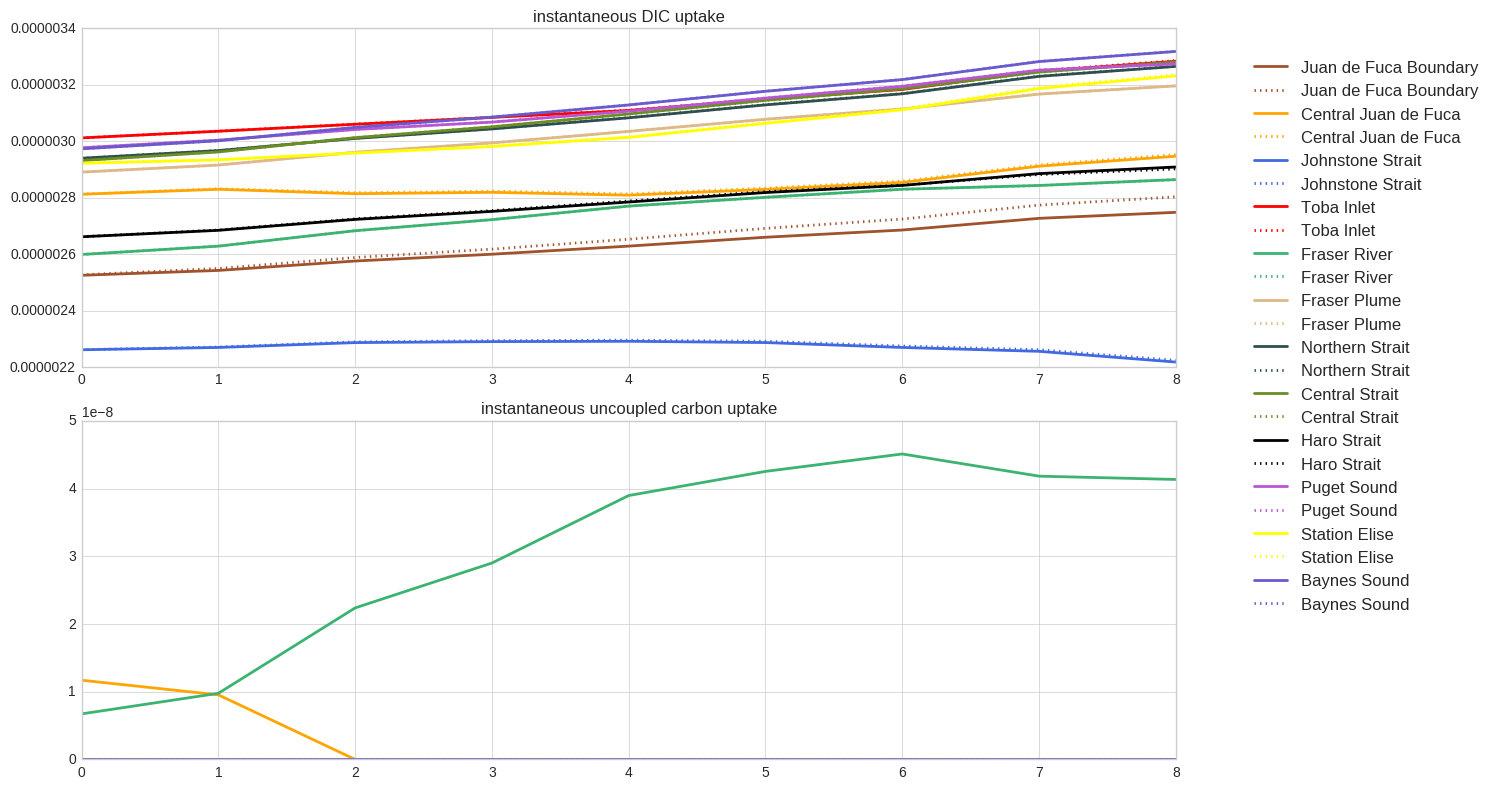

In [8]:

fig = plt.figure(figsize=(12,8))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    plt.xlim([0,93])

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tuptd = udic[:,0,ty+10,tx+10]
            tuptu = uuc[:,0,ty+10,tx+10]
            tuptd_nw = udic_nw[:,0,ty+10,tx+10]
            tuptu_nw = uuc_nw[:,0,ty+10,tx+10]
            ax.plot(tuptd,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(tuptd_nw,col,label=lab,linewidth=2, linestyle=':')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            plt.title('instantaneous DIC uptake')
#             #plt.ylim([1200,2200])
    
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tuptd = udic[:,0,ty+10,tx+10]
            tuptu = uuc[:,0,ty+10,tx+10]
            ax.plot(tuptu,col,label=lab,linewidth=2, linestyle='-')
            ax.plot(tuptu_nw,col,label=lab,linewidth=2, linestyle=':')
            plt.xlim([0,8])
            plt.title('instantaneous uncoupled carbon uptake')
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Flux, DIC differences, base case

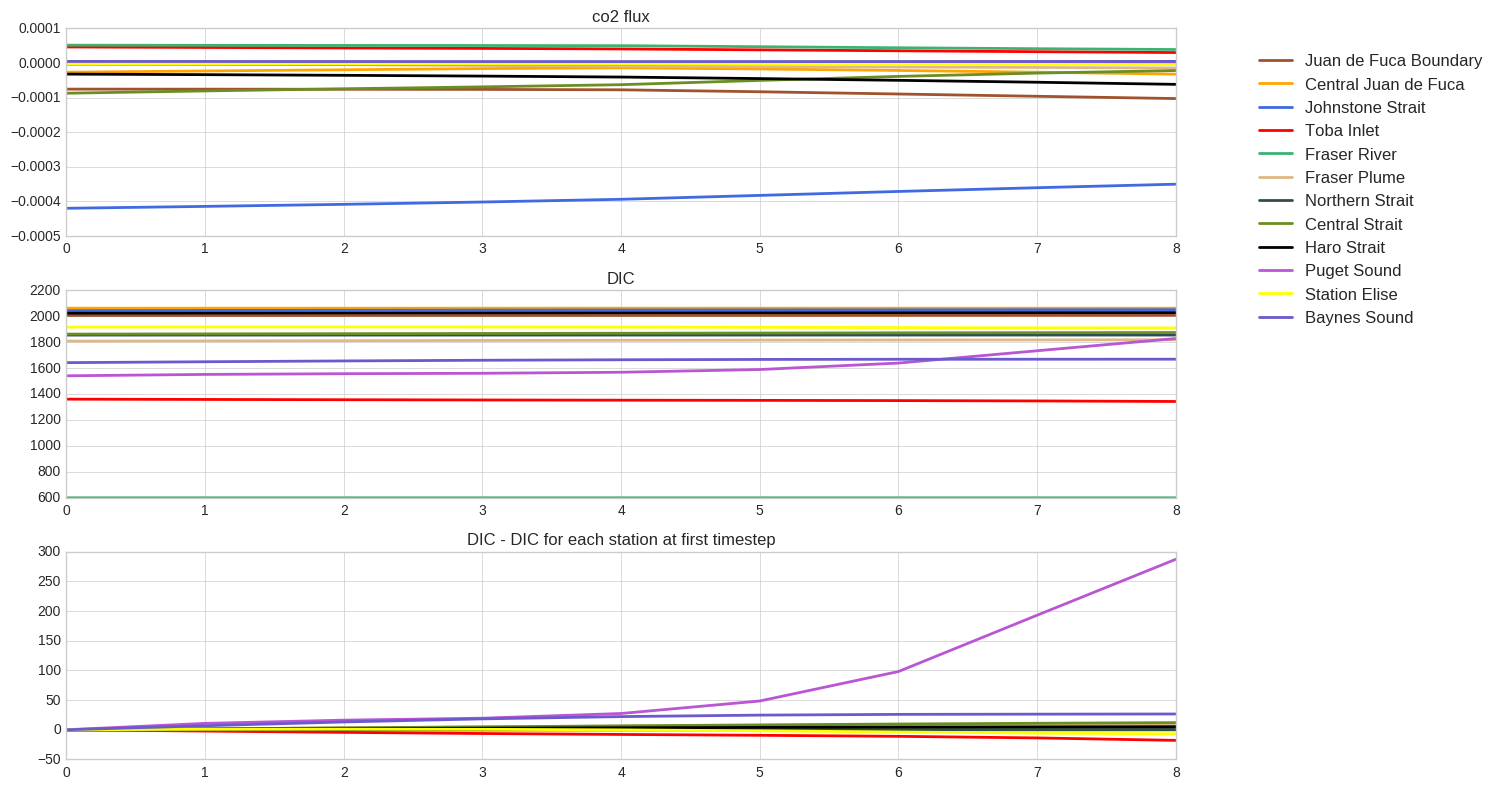

In [9]:

fig = plt.figure(figsize=(12,8))

for i in range(1,4):
    ax = fig.add_subplot(3,1,i)
    plt.xlim([0,93])

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tflco2 = flco2[:,ty+10,tx+10]
            tflco2_nw = flco2[:,ty+10,tx+10]
            tdic = dic[:,0,ty+10,tx+10]
            #ax.plot(tflco2,col,label=lab,linewidth=2, linestyle='-')
            #ax.plot(tflco2_nw,col,label=lab,linewidth=2, linestyle=':')
            ax.plot(tflco2,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            plt.title('co2 flux')
#             #plt.ylim([1200,2200])
    
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tflco2 = flco2[:,ty+10,tx+10]
            tdic = dic[:,0,ty+10,tx+10]
            ax.plot(tdic,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('DIC')
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tflco2 = flco2[:,ty+10,tx+10]
            basdic = dic[0,0,ty+10,tx+10]
            tdic = dic[:,0,ty+10,tx+10]
            ax.plot(tdic-basdic,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('DIC - DIC for each station at first timestep')
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## FLUX, dic diff, no wind case

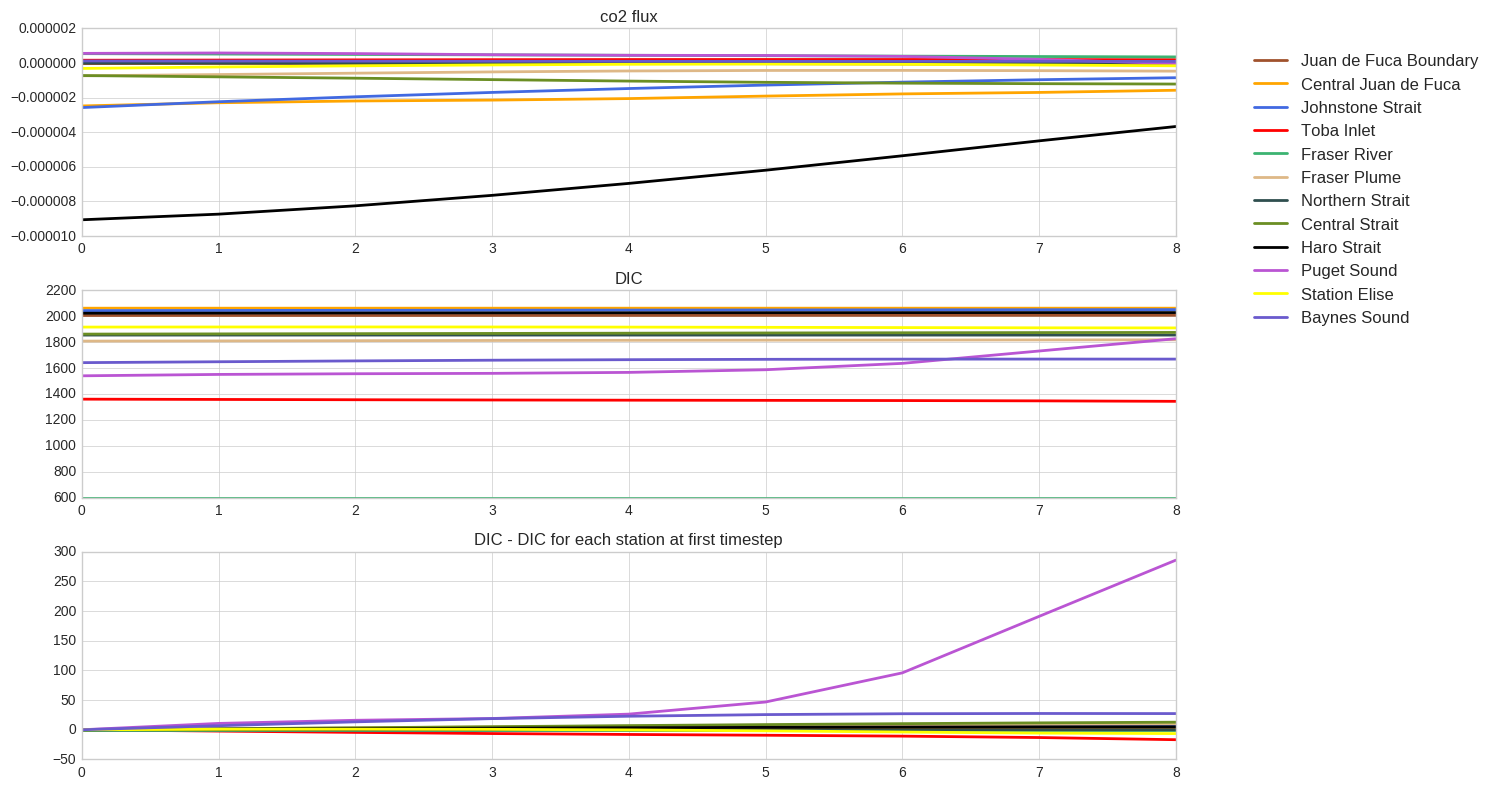

In [10]:

fig = plt.figure(figsize=(12,8))

for i in range(1,4):
    ax = fig.add_subplot(3,1,i)
    plt.xlim([0,93])

    if i == 1:
        print('')
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            #tflco2 = flco2[:,ty+10,tx+10]
            tflco2 = flco2_nw[:,ty+10,tx+10]
            tdic = dic[:,0,ty+10,tx+10]
            #ax.plot(tflco2,col,label=lab,linewidth=2, linestyle='-')
            #ax.plot(tflco2_nw,col,label=lab,linewidth=2, linestyle=':')
            ax.plot(tflco2,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.legend(bbox_to_anchor=(1.29, 0.95))
            plt.title('co2 flux')
#             #plt.ylim([1200,2200])
    
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    if i == 2:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tflco2 = flco2_nw[:,ty+10,tx+10]
            tdic = dic_nw[:,0,ty+10,tx+10]
            ax.plot(tdic,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('DIC')
            
    if i == 3:
        for i in range(0, len(tstat)):
            st = (tstat[i])
            tx = (cs.STATIONS[st]['x'])
            ty = (cs.STATIONS[st]['y'])
            col = cs.STATIONS[st]['color']
            lab = cs.STATIONS[st]['fullname']
            tflco2 = flco2_nw[:,ty+10,tx+10]
            basdic = dic_nw[0,0,ty+10,tx+10]
            tdic = dic_nw[:,0,ty+10,tx+10]
            ax.plot(tdic-basdic,col,label=lab,linewidth=2, linestyle='-')
            plt.xlim([0,8])
            plt.title('DIC - DIC for each station at first timestep')
    
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [11]:
w = nc.Dataset('/data/tjarniko/mock/ops_y2018m04d30.nc')
print(w)

dsin = w

#output file
ncname = './mockwind.nc'
dsout = nc.Dataset(ncname, "w", format="NETCDF4")
#Copy dimensions
for dname, the_dim in dsin.dimensions.items():
    #print(dname)
    print(len(the_dim))
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
# Copy variables
for v_name, varin in dsin.variables.items():
    outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
    #print(varin.datatype)
    
    # Copy variable attributes
    outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
    
    outVar[:] = varin[:]

dsout.close()



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    History: Mon Apr 30 10:40:50 2018: ncks -4 -L4 -O /results/forcing/atmospheric/GEM2.5/operational/ops_y2018m04d30.nc /results/forcing/atmospheric/GEM2.5/operational/ops_y2018m04d30.nc
created by wgrib2
    GRIB2_grid_template: 20
    NCO: 4.4.2
    dimensions(sizes): time_counter(24), y(266), x(256)
    variables(dimensions): float32 atmpres(time_counter,y,x), float64 nav_lat(y,x), float64 nav_lon(y,x), float32 percentcloud(time_counter,y,x), float32 precip(time_counter,y,x), float32 qair(time_counter,y,x), float32 solar(time_counter,y,x), float32 tair(time_counter,y,x), float32 therm_rad(time_counter,y,x), float64 time_counter(time_counter), float32 u_wind(time_counter,y,x), float32 v_wind(time_counter,y,x), float64 x(x), float64 y(y)
    groups: 

24
266
256


In [12]:
w2 = nc.Dataset('./mockwind.nc')
print(w2)

wind_zero = w2.variables['u_wind'][:]
wind_zero[:] = 0



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time_counter(24), y(266), x(256)
    variables(dimensions): float32 atmpres(time_counter,y,x), float64 nav_lat(y,x), float64 nav_lon(y,x), float32 percentcloud(time_counter,y,x), float32 precip(time_counter,y,x), float32 qair(time_counter,y,x), float32 solar(time_counter,y,x), float32 tair(time_counter,y,x), float32 therm_rad(time_counter,y,x), float64 time_counter(time_counter), float32 u_wind(time_counter,y,x), float32 v_wind(time_counter,y,x), float64 x(x), float64 y(y)
    groups: 



In [13]:
w = nc.Dataset('/data/tjarniko/mock/ops_y2018m05d02.nc')
print(w)

dsin = w

#output file
ncname = '/data/tjarniko/mock/zeroed/ops_y2018m05d02.nc'
dsout = nc.Dataset(ncname, "w", format="NETCDF4")
for dname, the_dim in dsin.dimensions.items():
    print(len(the_dim))
    dsout.createDimension(dname, len(the_dim) if not the_dim.isunlimited() else None)
for v_name, varin in dsin.variables.items():
    outVar = dsout.createVariable(v_name, varin.datatype, varin.dimensions)
    outVar.setncatts({k: varin.getncattr(k) for k in varin.ncattrs()})
    
    outVar[:] = varin[:]

dsout['u_wind'][:] = wind_zero[:]
dsout['v_wind'][:] = wind_zero[:]
dsout.close()


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.0
    History: Wed May  2 10:44:38 2018: ncks -4 -L4 -O /results/forcing/atmospheric/GEM2.5/operational/ops_y2018m05d02.nc /results/forcing/atmospheric/GEM2.5/operational/ops_y2018m05d02.nc
created by wgrib2
    GRIB2_grid_template: 20
    NCO: 4.4.2
    dimensions(sizes): time_counter(24), y(266), x(256)
    variables(dimensions): float32 atmpres(time_counter,y,x), float64 nav_lat(y,x), float64 nav_lon(y,x), float32 percentcloud(time_counter,y,x), float32 precip(time_counter,y,x), float32 qair(time_counter,y,x), float32 solar(time_counter,y,x), float32 tair(time_counter,y,x), float32 therm_rad(time_counter,y,x), float64 time_counter(time_counter), float32 u_wind(time_counter,y,x), float32 v_wind(time_counter,y,x), float64 x(x), float64 y(y)
    groups: 

24
266
256
